# Criando a tabela de Alunos

In [3]:
import pandas as pd

In [4]:
nomes_f = pd.read_json("https://guilhermeonrails.github.io/nomes_ibge/nomes-f.json")

In [5]:
nomes_m = pd.read_json("https://guilhermeonrails.github.io/nomes_ibge/nomes-m.json")

In [6]:
print('Quantidade de nomes: ' + str(len(nomes_f)+len(nomes_m)))

Quantidade de nomes: 400


In [7]:
frames = [nomes_f, nomes_m]

In [8]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes.sample(5)

,nome
176,CELIO
66,DANILO
172,WANDERSON
99,DENISE
14,JESSICA


# Criando os IDs para Alunos

In [9]:
import numpy as np

In [10]:
np.random.seed(123)

In [11]:
total_alunos = len(nomes_f)+len(nomes_m)
total_alunos

400

In [12]:
nomes['id_aluno'] = np.random.permutation(total_alunos)+1

In [13]:
nomes.sample(5)

,nome,id_aluno
188,POLIANA,369
57,DAIANE,303
3,FRANCISCO,382
182,CHARLES,33
30,ANDERSON,111


In [14]:
dominios = ['@escolapython.com.br', '@escolapython.edu']
nomes['dominio'] = np.random.choice(dominios, total_alunos)
nomes['email'] = nomes['nome'].str.cat(nomes.dominio).str.lower()

In [15]:
nomes.sample(5)

,nome,id_aluno,dominio,email
84,SEVERINO,78,@escolapython.com.br,severino@escolapython.com.br
0,JOSE,331,@escolapython.edu,jose@escolapython.edu
179,IAGO,340,@escolapython.com.br,iago@escolapython.com.br
10,SANDRA,174,@escolapython.com.br,sandra@escolapython.com.br
171,TERESINHA,45,@escolapython.com.br,teresinha@escolapython.com.br


#Criando a tabela Cursos

In [16]:
!pip3 install html5lib
!pip3 install lxml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
import html5lib

In [19]:
url = 'https://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [21]:
cursos = cursos[0]

In [23]:
cursos.head(5)

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


#Criando os IDs para Cursos

In [25]:
cursos = cursos.rename(columns={'Nome do curso': 'nome_do_curso'})

In [26]:
cursos['id'] = cursos.index + 1

In [28]:
cursos = cursos.set_index('id')

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


#Matriculando os Alunos nos Cursos

In [32]:
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ARTHUR,320,@escolapython.com.br,arthur@escolapython.com.br
57,DAIANE,303,@escolapython.edu,daiane@escolapython.edu
85,HELENA,221,@escolapython.com.br,helena@escolapython.com.br
183,IRACI,8,@escolapython.com.br,iraci@escolapython.com.br
189,DALVA,137,@escolapython.com.br,dalva@escolapython.com.br


In [38]:
nomes['matriculas'] = np.ceil(np.random.exponential(size=total_alunos)*1.5).astype(int)

In [39]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
67,HENRIQUE,64,@escolapython.com.br,henrique@escolapython.com.br,4
102,MARILENE,149,@escolapython.com.br,marilene@escolapython.com.br,1
49,ALEX,337,@escolapython.com.br,alex@escolapython.com.br,1
8,PATRICIA,379,@escolapython.edu,patricia@escolapython.edu,5
89,JEAN,89,@escolapython.com.br,jean@escolapython.com.br,2


In [40]:
nomes.matriculas.describe()

count    400.000000
mean       2.030000
std        1.493209
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       13.000000
Name: matriculas, dtype: float64

In [41]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


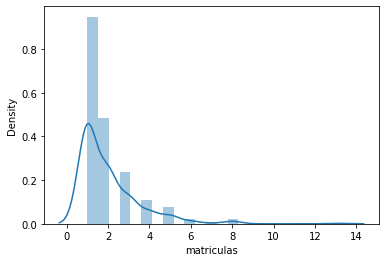

In [42]:
sns.distplot(nomes.matriculas)

In [43]:
nomes.matriculas.value_counts()

1     198
2     101
3      50
4      23
5      16
8       5
6       5
13      1
7       1
Name: matriculas, dtype: int64

# Selecionando cursos para cada um dos alunos

In [46]:
todas_matriculas = []
x = np.random.rand(20)
prob = x/sum(x)

In [54]:
for index, row in nomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns = ['id_aluno', 'id_curso'])

In [59]:
matriculas_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'quantidade_alunos'})

# Saída em diferentes formatos

In [62]:
matriculas_curso.to_csv('matriculas_por_curso.csv', index=False)

In [63]:
pd.read_csv('matriculas_por_curso.csv')

,quantidade_alunos,nome_do_curso
0,49,Lógica de programação
1,42,Java para Web
2,21,C# para Web
3,4,Ruby on Rails
4,42,Cursos de Python
5,25,PHP com MySql
6,60,.NET para web
7,53,Novas integrações com Java
8,4,TDD com Java
9,59,Código limpo com C#


In [64]:
matriculas_json = matriculas_curso.to_json()

In [65]:
matriculas_json

'{"quantidade_alunos":{"1":49,"2":42,"3":21,"4":4,"5":42,"6":25,"7":60,"8":53,"9":4,"10":59,"11":66,"12":65,"13":21,"14":67,"15":89,"16":58,"17":66,"18":3,"19":13,"20":5},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

In [66]:
matriculas_html = matriculas_curso.to_html()

In [68]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>49</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>42</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>21</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>42</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>25</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>60</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>53</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>4</td>
     

# Criando o banco SQL

In [70]:
!pip install sqlalchemy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [71]:
from sqlalchemy import create_engine, MetaData, Table, inspect 

In [74]:
engine = create_engine('sqlite:///:memory:')
type(engine)

sqlalchemy.engine.base.Engine

In [75]:
matriculas_curso.to_sql('matriculas', engine)

In [78]:
inspector = inspect(engine)
print(inspector.get_table_names())

['matriculas']


# Buscando do banco SQL

In [79]:
query = 'select * from matriculas where quantidade_alunos < 20'

In [80]:
pd.read_sql(query, engine)

,id_curso,quantidade_alunos,nome_do_curso
0,4,4,Ruby on Rails
1,9,4,TDD com Java
2,18,3,Programação funcional
3,19,13,Boas práticas em Java
4,20,5,Orientação objetos com Java


In [83]:
alunos_por_curso = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_alunos'])

In [85]:
cursos_com_mais_alunos = alunos_por_curso.query('quantidade_alunos > 80')

# Escrevendo no Banco de Dados

In [94]:
cursos_com_mais_alunos.to_sql('cursos_com_mais_alunos', con=engine)

In [96]:
print(engine.table_names())

['alunos_curso', 'alunos_por_curso', 'cursos_com_mais_alunos', 'matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.
